In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('data.csv')
df.head()

,product_name,brand_name,rating,rating_count,marked_price,discounted_price,sizes,product_link,img_link,product_tag,brand_tag,discount_amount,discount_percent
0,Croc Textured Two Fold Wallet,Lino Perros,0.0,0,1295,828,Onesize,wallets/lino-perros/lino-perros-women-peach-co...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",wallets,lino-perros,467,36
1,Men Striped Sliders,Mast & Harbour,4.0,76,1299,584,"UK6,UK7,UK8,UK9,UK10,UK11",flip-flops/mast--harbour/mast--harbour-men-nav...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",flip-flops,mast--harbour,715,55
2,Printed A-line Kurta,Biba,4.3,66,1999,1599,"S,M,L,XL,XXL,3XL",kurtas/biba/biba-women-off-white--black-printe...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",kurtas,biba,400,20
3,Girls Floral Printed T-shirt,Anthrilo,0.0,0,599,539,"7-8Y,8-9Y,9-10Y",tshirts/anthrilo/anthrilo-girls-white-floral-p...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",tshirts,anthrilo,60,10
4,Women Printed Kurta with Skirt,FASHION DWAR,0.0,0,2899,2899,"S,M,L,XL",kurta-sets/fashion-dwar/fashion-dwar-women-mul...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",kurta-sets,fashion-dwar,0,0


In [2]:
df.shape

(168029, 13)

### 1. How many unique products are there in the dataset? (5 marks)
You need to find product ID of each product from product_link and then find the number of unique product ids

- Finding Unique Products as per their Product ID
- Removing Products with Duplicate Product ID

In [3]:
#finding number of unique products
df['product_link'].nunique()

146438

In [4]:
#dropping duplicates with respect to product_link
df.drop_duplicates(subset = ['product_link'],inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146438 entries, 0 to 167991
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   product_name      146438 non-null  object 
 1   brand_name        146438 non-null  object 
 2   rating            146438 non-null  float64
 3   rating_count      146438 non-null  int64  
 4   marked_price      146438 non-null  int64  
 5   discounted_price  146438 non-null  int64  
 6   sizes             146438 non-null  object 
 7   product_link      146438 non-null  object 
 8   img_link          146438 non-null  object 
 9   product_tag       146438 non-null  object 
 10  brand_tag         146438 non-null  object 
 11  discount_amount   146438 non-null  int64  
 12  discount_percent  146438 non-null  int64  
dtypes: float64(1), int64(5), object(7)
memory usage: 15.6+ MB


### 2. What is the average rating of the products? (2 mark)
- Try it without the product that are having rating 0
- Try it without the product that are having 0 people given any rating

In [5]:
#filtering to exclude 0.0 rating
df_rating_filter = df[df['rating']>0.0]
#filtering to exclude rating_count = 0
df_rating_filter = df_rating_filter[df_rating_filter['rating_count']>0]
df_rating_filter['rating'].mean()

4.167857186750868

### 3. What is the average discount percentage of the products? (1 mark)

In [6]:
df['discount_percent'].mean()

37.1512995260793

### 4. What are the top 5 most expensive products? (2 marks)
- Make sure that there can be multiple brands with same name so you can take brand ID also into considration

In [7]:
#finding 5 most expensive marked price value
filterPrice = df['marked_price'].sort_values(ascending = False)[:5]
#getting indices of products
filterPrice = np.array(pd.DataFrame(filterPrice).index)

In [8]:
#filtering using loc function and providing indices
df.loc[filterPrice,:]

,product_name,brand_name,rating,rating_count,marked_price,discounted_price,sizes,product_link,img_link,product_tag,brand_tag,discount_amount,discount_percent
27039,Lord Krishna Showpiece,eCraftIndia,0.0,0,113999,45599,Onesize,showpieces/ecraftindia/ecraftindia-gold-toned-...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",showpieces,ecraftindia,68400,60
56197,Durga Maa On Lion Showpiece,eCraftIndia,0.0,0,71999,28799,Onesize,showpieces/ecraftindia/ecraftindia-gold-toned-...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",showpieces,ecraftindia,43200,60
116473,Men Stainless Steel Straps Multi Function Auto...,EARNSHAW,0.0,0,63950,38370,Onesize,watches/earnshaw/earnshaw-men-black-dial--silv...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",watches,earnshaw,25580,40
117809,Men Stainless Steel Straps Multi Function Auto...,EARNSHAW,0.0,0,63950,38370,Onesize,watches/earnshaw/earnshaw-men-rose-gold-toned-...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",watches,earnshaw,25580,40
116276,Men Leather Straps Multi Function Automatic Mo...,EARNSHAW,0.0,0,56950,34170,Onesize,watches/earnshaw/earnshaw-men-gold-toned-patte...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",watches,earnshaw,22780,40


### 5. What are the top 10 brands by the number of products in the dataset? (2 mark)

In [9]:
#grouping by brand name and converting to a data frame
trial = df.groupby(['brand_name']).count()
trial = pd.DataFrame(trial)
trial['product_name'].nlargest(10)

brand_name
Roadster                 4557
Mast & Harbour           2397
DressBerry               2073
H&M                      1998
Anouk                    1784
max                      1772
HRX by Hrithik Roshan    1734
Puma                     1667
MANGO                    1625
HERE&NOW                 1612
Name: product_name, dtype: int64

### 6. List top 5 brands with maxiumum average rating of products? (2 marks)
Neglect the products which are not reviewed by any person

In [10]:
#excluding products that are not reviewed (rating_count = 0)
df_rated = df[df['rating_count']>0]
trial = pd.DataFrame(df_rated.groupby('brand_name').mean()['rating'])
trial['rating'].nlargest(5)

brand_name
1 Stop Fashion    5.0
Anahi             5.0
Apple             5.0
BEAUTY GLAZED     5.0
CUSHYBEE          5.0
Name: rating, dtype: float64

### 7. Plot a histogram of the distribution of ratings of following brand. (3 marks)
- H&M
- max
- Puma
- MANGO

Neglect the products which are not reviewed by any person

In [11]:
df_rated = df[df['rating_count']>0]
selected_brands = ['H&M','max','Puma','MANGO'] 
frames = []
for brand in selected_brands:
    temp = df_rated[df_rated['brand_name']==brand]
    frames.append(temp)
df_selected_brands = pd.concat(frames)
df_selected_brands['brand_name'].unique()

array(['H&M', 'max', 'Puma', 'MANGO'], dtype=object)

<AxesSubplot:xlabel='rating', ylabel='Count'>

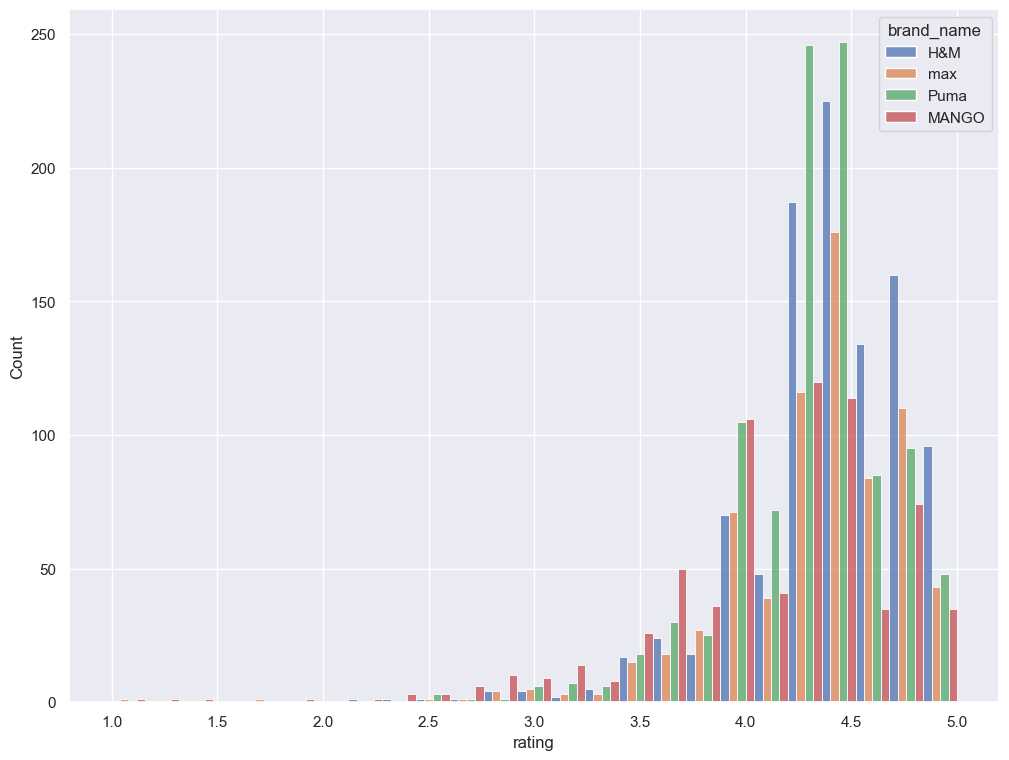

In [12]:
sns.set(rc={'figure.figsize':(12,9)})
sns.histplot(x='rating',data = df_selected_brands,hue = 'brand_name',multiple = 'dodge', bins = 25)

### 8. What is the distribution of discounts by brand for specific brands mentioned below? (2 marks)

- H&M
- max
- Puma
- MANGO

Neglect the products which are not reviewed by any person.
Neglect the products which are not on any discount.

In [13]:
df_rated = df[df['rating_count']>0]
df_discount = df_rated[df_rated['discount_percent']>0]
selected_brands = ['H&M','max','Puma','MANGO']
frames = []
for brand in selected_brands:
    temp = df_discount[df_discount['brand_name']==brand]
    frames.append(temp)
df_selected_brands = pd.concat(frames)
df_selected_brands['brand_name'].unique()

array(['H&M', 'max', 'Puma', 'MANGO'], dtype=object)

<AxesSubplot:xlabel='discount_percent', ylabel='Count'>

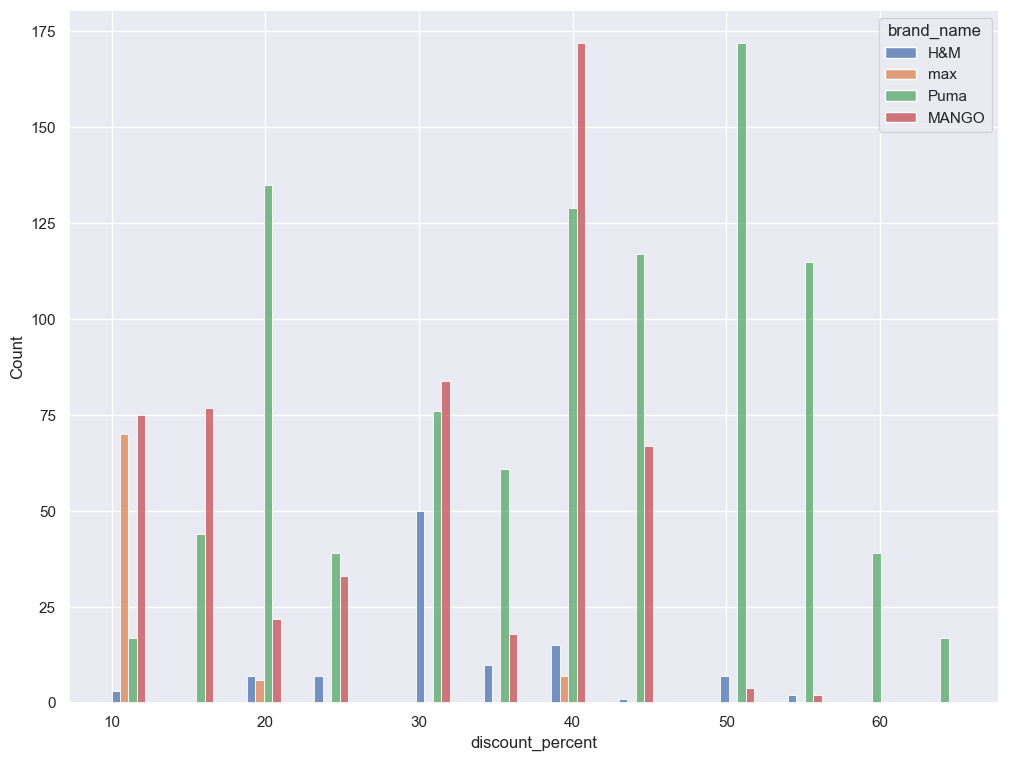

In [14]:
sns.set(rc={'figure.figsize':(12,9)})
sns.histplot(x='discount_percent',data = df_selected_brands,hue = 'brand_name',multiple = 'dodge', bins = 25)

### 9. Is there any trend or pattern you can find between discount percent and rating of the product? (3 marks)

In [15]:
df.corr()
#rating and discount_percent is showing a 26.34% correlation

,rating,rating_count,marked_price,discounted_price,discount_amount,discount_percent
rating,1.000000,0.137829,-0.098711,-0.176379,0.068298,0.263457
rating_count,0.137829,1.000000,-0.056568,-0.057248,-0.026234,0.016015
marked_price,-0.098711,-0.056568,1.000000,0.869532,0.676286,0.089909
discounted_price,-0.176379,-0.057248,0.869532,1.000000,0.224242,-0.277484
discount_amount,0.068298,-0.026234,0.676286,0.224242,1.000000,0.591290
discount_percent,0.263457,0.016015,0.089909,-0.277484,0.591290,1.000000


<AxesSubplot:xlabel='rating', ylabel='discount_percent'>

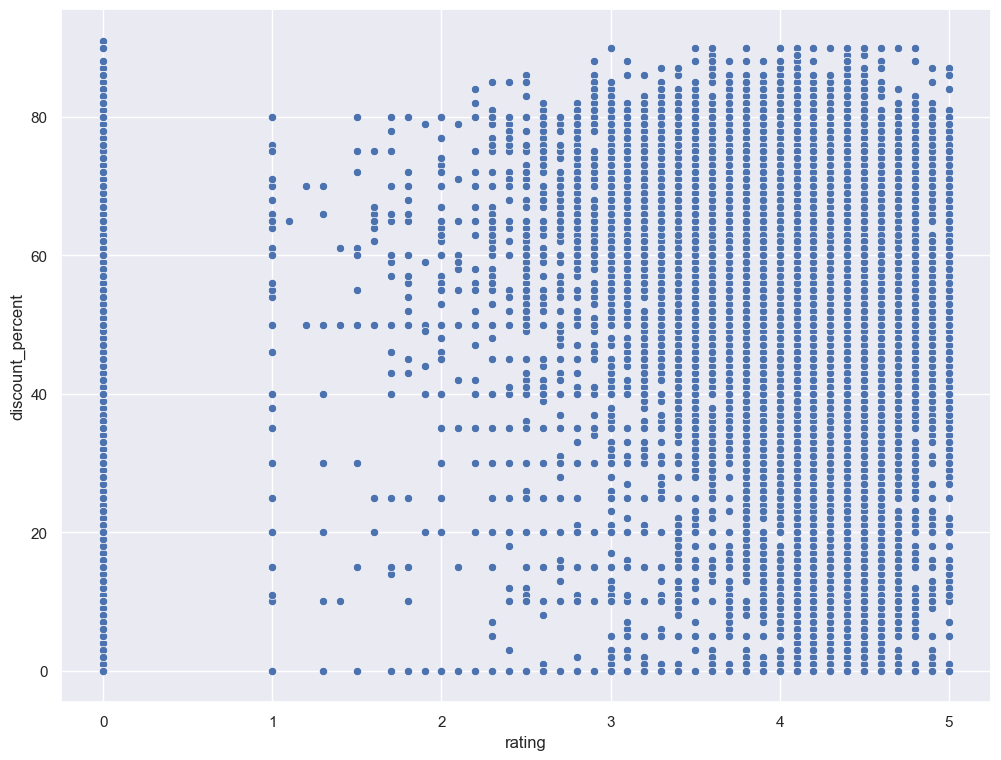

In [16]:
#scatterplot for rating and discount_percent
sns.scatterplot(x='rating',y='discount_percent', data = df)


### 10. What are the top 10 most popular tags in the dataset? (2 marks)

In [17]:
#grouping by brand tag and converting to a data frame
trial = df.groupby(['brand_tag']).count()
trial = pd.DataFrame(trial)
trial['product_name'].nlargest(10)

brand_tag
roadster                 4557
mast--harbour            2397
dressberry               2073
hm                       1998
anouk                    1784
max                      1772
hrx-by-hrithik-roshan    1734
puma                     1667
mango                    1625
herenow                  1612
Name: product_name, dtype: int64

### 11. Are there any relations between the rating and number of people who rated the products? (4 marks)
- Neglect the products that are not reviewed by any person
- Neglect the products that are having zero rating

In [18]:
#filtering to exclude 0.0 rating
df_rating_filter = df[df['rating']>0.0]
#filtering to exclude rating_count = 0
df_rating_filter = df_rating_filter[df_rating_filter['rating_count']>0]
df_rating_filter.corr()
#There is very little correlation of 2.8148 percent between rating and rating_count

,rating,rating_count,marked_price,discounted_price,discount_amount,discount_percent
rating,1.000000,0.028148,-0.052241,0.046655,-0.145741,-0.217961
rating_count,0.028148,1.000000,-0.073113,-0.060802,-0.055599,-0.033739
marked_price,-0.052241,-0.073113,1.000000,0.832910,0.758941,0.167931
discounted_price,0.046655,-0.060802,0.832910,1.000000,0.271773,-0.252429
discount_amount,-0.145741,-0.055599,0.758941,0.271773,1.000000,0.589044
discount_percent,-0.217961,-0.033739,0.167931,-0.252429,0.589044,1.000000


### 12. What are the top 10 Most Expensive brands? (3 marks)
- Use marked price as the reference to find the most expensive brand

In [19]:
#mean is taken to find average marked price of products within a brand_name group
trial = df.groupby('brand_name').mean()['marked_price']
trial = pd.DataFrame(trial)
trial['marked_price'].nlargest(10)

brand_name
EARNSHAW                 46950.000000
Victorinox               44000.000000
MOSCHINO COUTURE         40000.000000
dyson                    39233.333333
Tom Ford                 38800.000000
Valuchi                  38050.000000
Bottega Veneta           34490.000000
Versace Jeans Couture    33125.000000
TISSOT                   31928.571429
DUCATI CORSE             29999.000000
Name: marked_price, dtype: float64

### 13. What are the top 10 Most Expensive Product Category? (4 marks)
- Use marked price as the reference to find the most expensive brand

In [20]:
#mean is taken to find average marked price of products within a product_tag group
trial = df.groupby('product_tag').mean()['marked_price']
trial = pd.DataFrame(trial)
trial['marked_price'].nlargest(10)

product_tag
trolley-bag           13331.718631
suits                 12148.698182
fitness-bands         11713.285714
watch-gift-set        11113.266667
badminton-racquets    10850.000000
sherwani              10145.069930
floor-lamps            9433.393939
smart-watches          8929.726457
air-fryer              8850.000000
carpets                8834.657534
Name: marked_price, dtype: float64

### 14. Analyse the Violen Plot of watches of following brands mentioned below ? (5 marks)

 - Take Marked Price for Reference
 - Take product_tag as watches
 - Take brand_tag as tommy-hilfiger, daniel-wellington, armani-exchange, emporio-armani, earnshaw, tissot
 - Make sure to write your inference based on the violen plot of following watch brands price

In [21]:
df_watch_tag = df[df['product_tag']=='watches']
df_watch_tag

,product_name,brand_name,rating,rating_count,marked_price,discounted_price,sizes,product_link,img_link,product_tag,brand_tag,discount_amount,discount_percent
209,Women Analogue Watch,Fossil,4.8,11,9995,6996,Onesize,watches/fossil/fossil-women-silver-toned-analo...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",watches,fossil,2999,30
294,Men Analogue Watch,Daniel Klein,4.1,141,6990,4613,Onesize,watches/daniel-klein/daniel-klein-exclusive-me...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",watches,daniel-klein,2377,34
357,Women Leather Straps Watch,French Connection,4.6,12,6950,1737,Onesize,watches/french-connection/french-connection-wo...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",watches,french-connection,5213,75
373,Men Analogue Watch,WROGN,4.2,23,4999,1499,Onesize,watches/wrogn/wrogn-men-black-dial--bracelet-s...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",watches,wrogn,3500,70
395,Men Stainless Steel Straps Watch,Tommy Hilfiger,2.2,9,5995,3896,Onesize,watches/tommy-hilfiger/tommy-hilfiger-men-blue...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",watches,tommy-hilfiger,2099,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
167498,Women Leather Straps Watch,CASIO,0.0,0,10495,9445,Onesize,watches/casio/casio-women-brown-dial--pink-lea...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",watches,casio,1050,10
167500,Men Caviar Analogue Watch,MVMT,0.0,0,10355,6213,Onesize,watches/mvmt/mvmt-men-black-caviar-analogue-wa...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",watches,mvmt,4142,40
167623,Women Analogue Watch,Sonata,4.5,8,1299,1299,Onesize,watches/sonata/sonata-women-white-analogue-wat...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",watches,sonata,0,0
167698,Women Solid Analogue Watch,ESPRIT,0.0,0,11900,5831,Onesize,watches/esprit/esprit-women-gold-toned-analogu...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",watches,esprit,6069,51


In [22]:
selected_brands = ['tommy-hilfiger', 'daniel-wellington', 'armani-exchange', 'emporio-armani', 'earnshaw', 'tissot']
frames = []
for brand in selected_brands:
    temp = df_watch_tag[df_watch_tag['brand_tag']==brand]
    frames.append(temp)
df_selected_brands = pd.concat(frames)
df_selected_brands['brand_tag'].unique()

array(['tommy-hilfiger', 'daniel-wellington', 'armani-exchange',
       'emporio-armani', 'earnshaw', 'tissot'], dtype=object)

<AxesSubplot:xlabel='brand_name', ylabel='marked_price'>

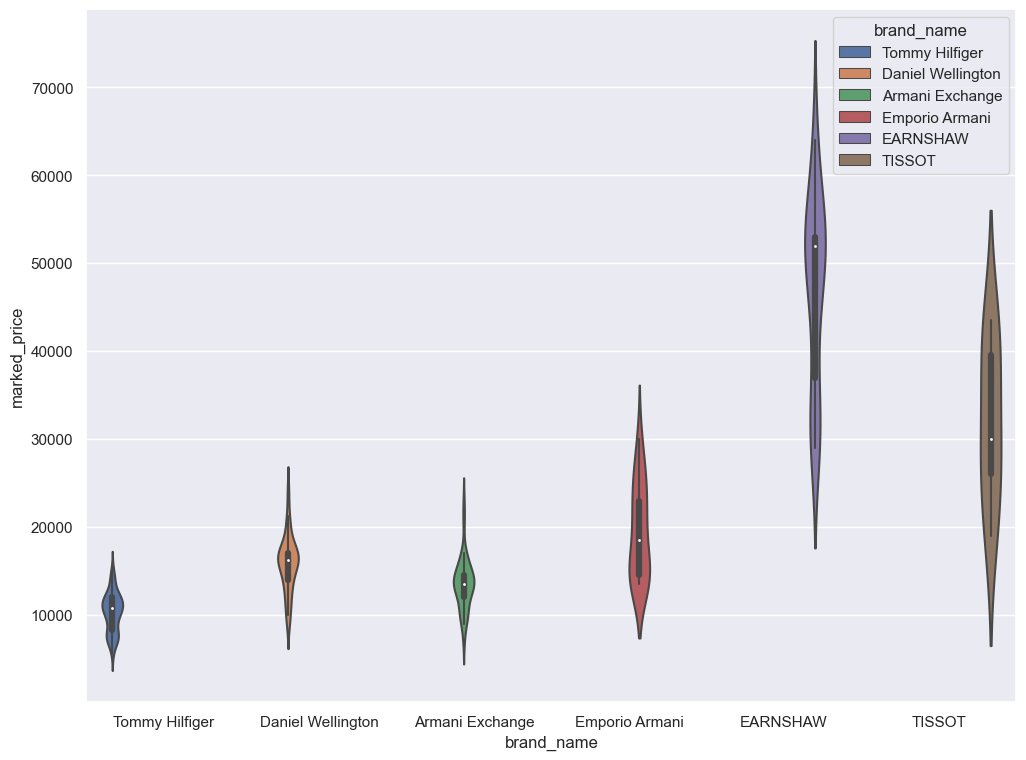

In [23]:
sns.violinplot(x='brand_name',y='marked_price' ,hue='brand_name', data= df_selected_brands)

# Inference drawn from the violin plot is the ranges and distributions of the given brands in terms of marked_price.

The brands: Tommy Hilfiger, Daniel Wellington, Armani Exchange seem to have a low range in terms of marked prices and all of them fall within the under 30000 range. Emporio Armani brand has more range in marked price in comparison to the first three brands, but Earnshaw and Tissot have the most variation in terms of marked prices. Between Earnshaw and Tissot, Earnshaw can 
be considered to be more of a luxury brand by comparing it's range endings

### 15. List top 5 brands which are having most wide range or products
- Use marked price as the reference

In [24]:
#Sorting by variance after grouping by brand name
trial = df.groupby('brand_name')['marked_price'].var()
trial = pd.DataFrame(trial)
trial['marked_price'].nlargest(5)

brand_name
eCraftIndia            6.388242e+08
Samsung                3.965430e+08
D1 Milano              3.049750e+08
Simond By Decathlon    3.001250e+08
Zippo                  2.785008e+08
Name: marked_price, dtype: float64

In [26]:
seld_brands = ['eCraftIndia','Samsung','D1 Milano','Simond By Decathlon', 'Zippo']
frames = []
for brand in seld_brands:
    temp = df[df['brand_name']==brand]
    frames.append(temp)
df_var_brands= pd.concat(frames)
df_var_brands['brand_name'].unique()

array(['eCraftIndia', 'Samsung', 'D1 Milano', 'Simond By Decathlon',
       'Zippo'], dtype=object)

<AxesSubplot:xlabel='brand_name', ylabel='marked_price'>

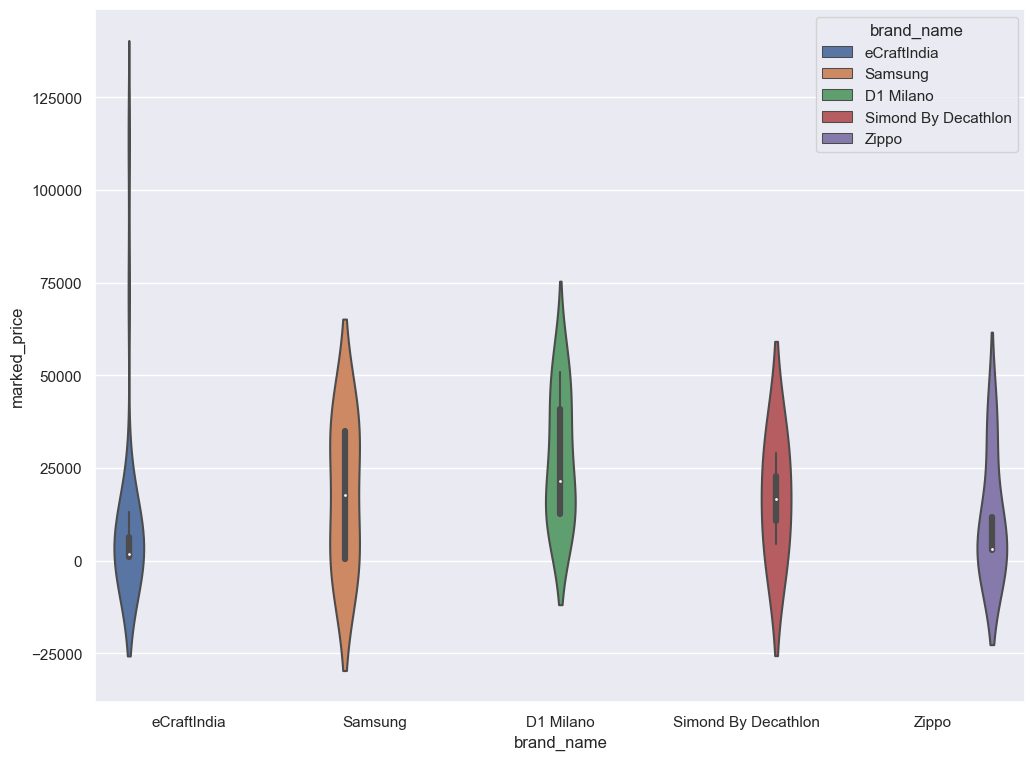

In [27]:
sns.violinplot(x='brand_name',y='marked_price' ,hue='brand_name', data= df_var_brands)